# Problem 3: Hierarchical Clustering

In this problem we implement hierarchical clustering and use it on different datasets.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Wrapper class for hierarchical clustering
class HierarchicalClustering:
    def __init__(self):
        pass
    
    def linkages(self, X, linkage_type='ward'):
        if isinstance(X, list):
            X = np.array(X)
        if isinstance(X, pd.DataFrame):
            X = X.values
        linkage_matrix = linkage(X, linkage_type)
        return linkage_matrix
    
    def dendogram(self, linkage_matrix, x_label=None, y_label=None, title=None):
        plt.figure(figsize=(15, 8))
        dendrogram(linkage_matrix)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)

        plt.show()

## Part 1: Hierarchical Clustering on New Customers Data

We load the given dataset and perform hierarchical clustering on it. We vary features and linkage types to see how the clustering changes.

In [4]:
# Load the dataset
customer_df = pd.read_csv('SMAI-Dataset-hc-dataset/new_customers.csv')
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Feature selection and preprocessing
X = customer_df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.loc[:, 'Genre'] = [0 if x == 'Male' else 1 for x in X.loc[:, 'Genre']]
for f in ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    X.loc[:, f] = StandardScaler().fit_transform(X.loc[:, f].to_numpy().reshape(-1, 1))

In [6]:
X.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


### Varying linkage types

By varying the linkage types, we can see how they affect the clustering.

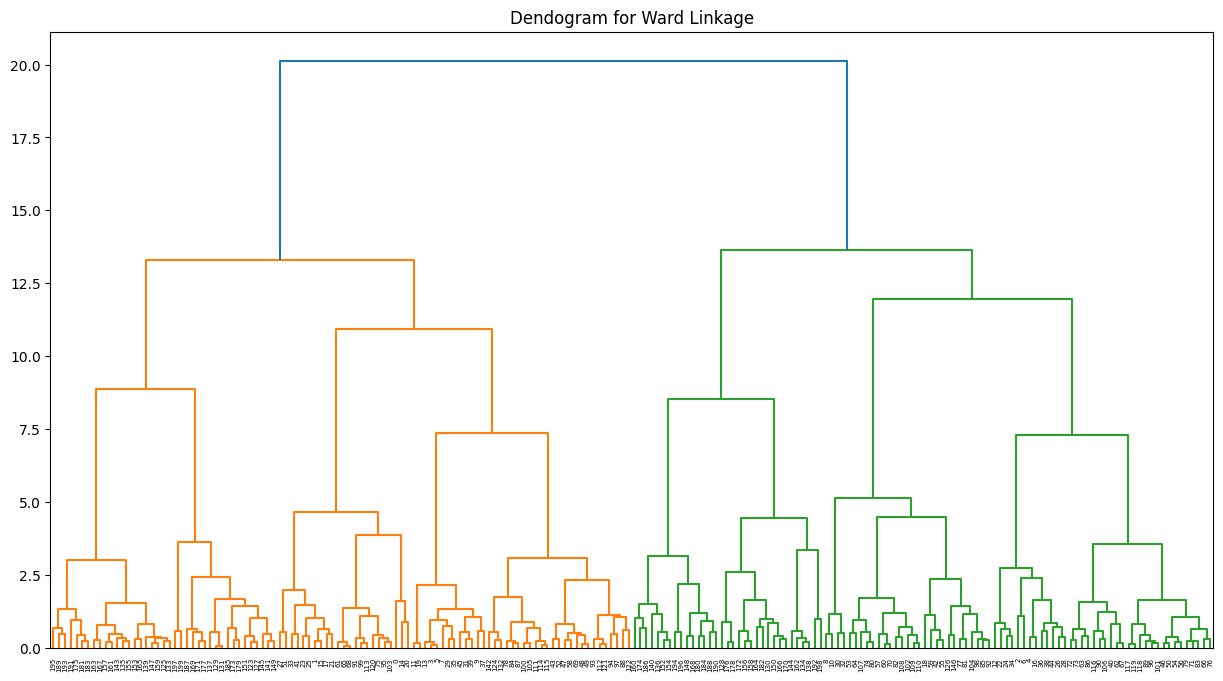

In [7]:
hc = HierarchicalClustering()
hc.dendogram(hc.linkages(X, 'ward'), title='Dendogram for Ward Linkage')

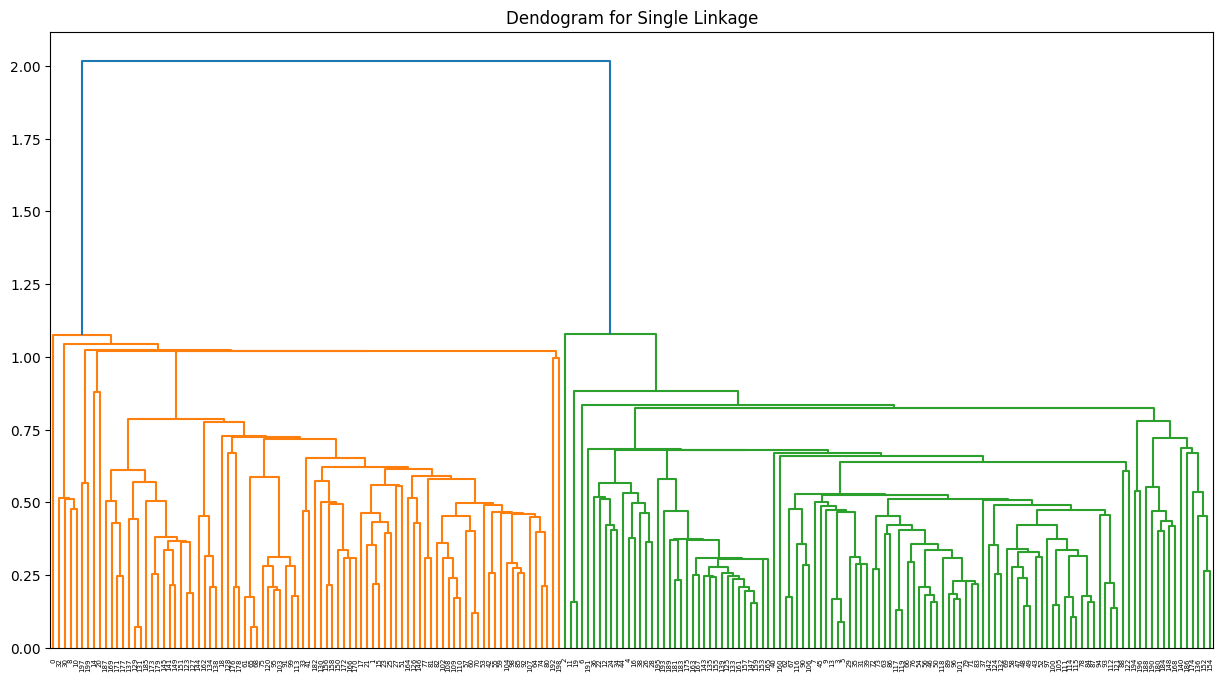

In [8]:
hc.dendogram(hc.linkages(X, 'single'), title='Dendogram for Single Linkage')

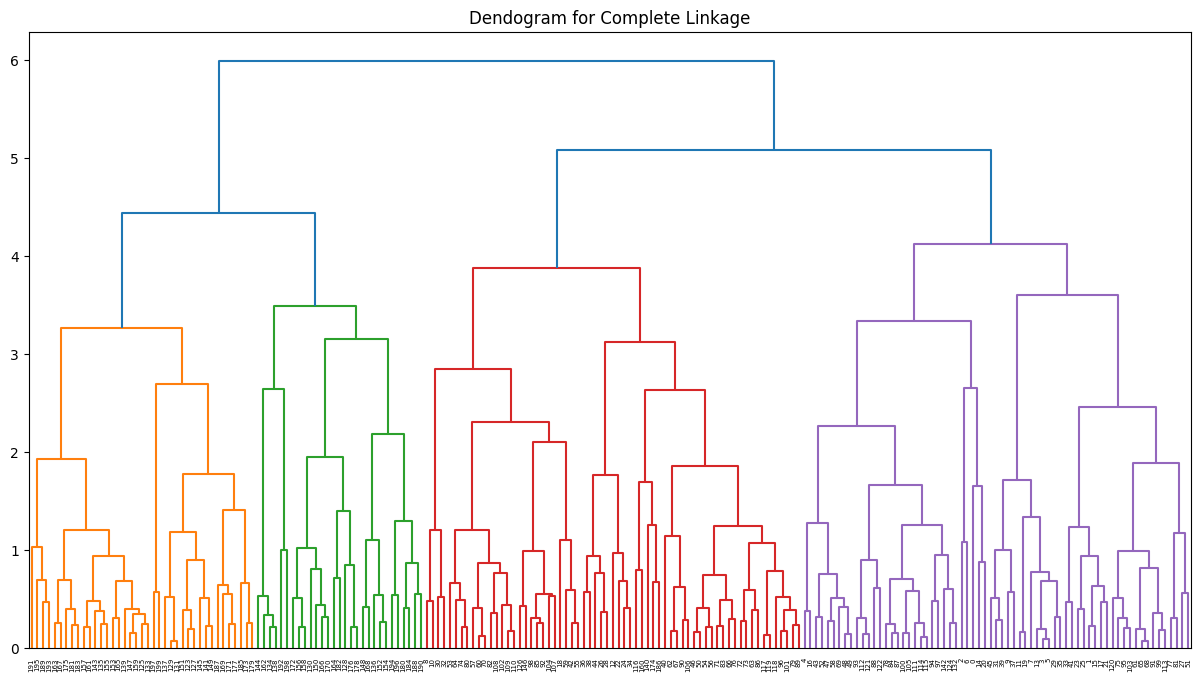

In [9]:
hc.dendogram(hc.linkages(X, 'complete'), title='Dendogram for Complete Linkage')

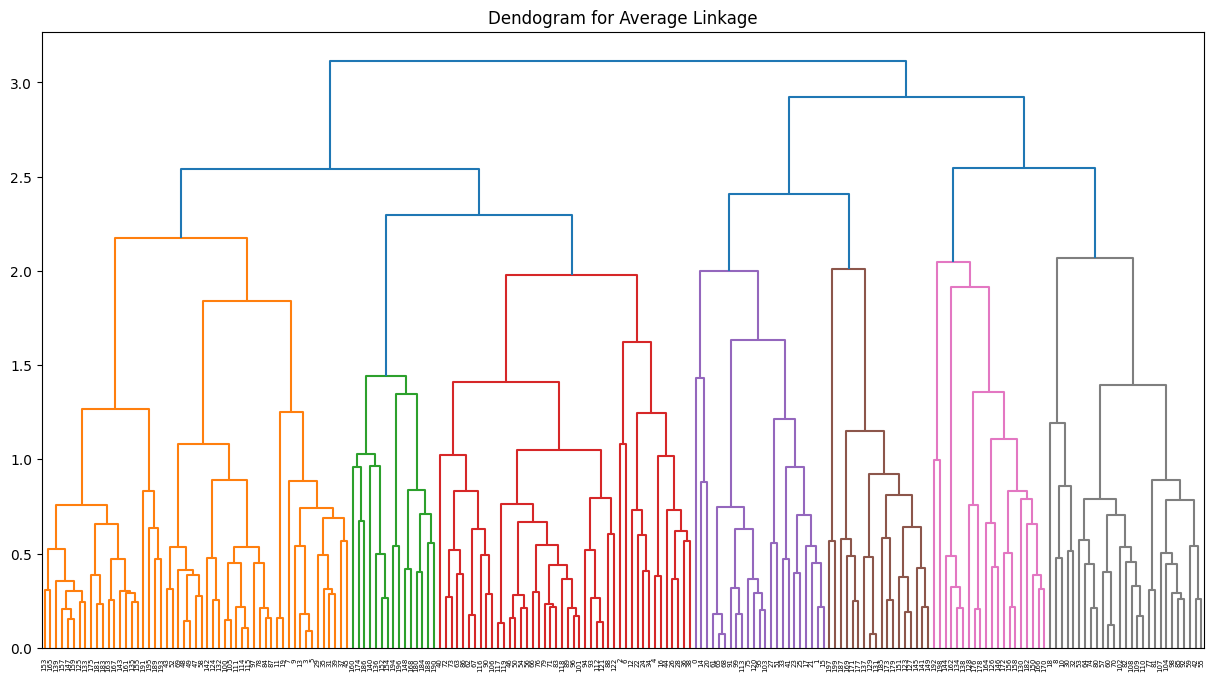

In [10]:
hc.dendogram(hc.linkages(X, 'average'), title='Dendogram for Average Linkage')

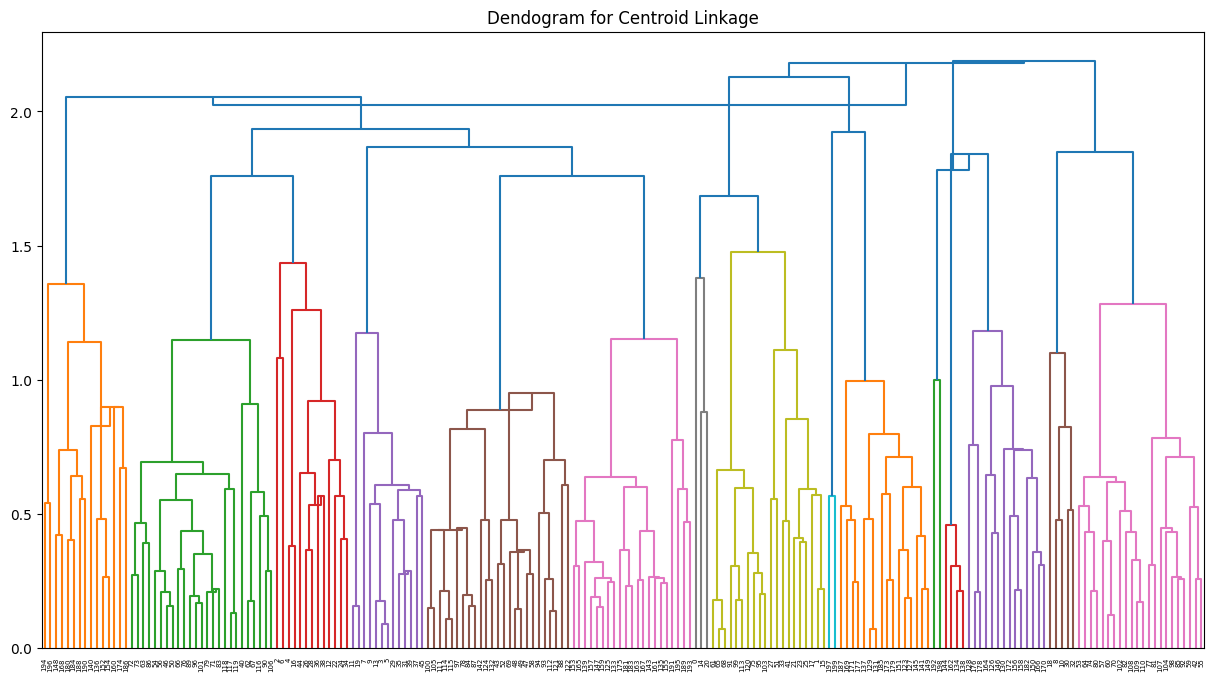

In [11]:
hc.dendogram(hc.linkages(X, 'centroid'), title='Dendogram for Centroid Linkage')

Here we can see how the linkage types affect the dendograms. We can see that the ward linkage gives balanced clusters as compared to other methods. Single linkage performs poorly.

Here are some observations from the above:
- Ward linkage gives balanced clusters
- Single linkage gives very unbalanced dendograms.
- Average linkage and centroid linkage give similar results.

 ### Trying different feature sets with linkages
 
By varying feature sets, we can make observations about customer behaviour. We can see how different features affect the clustering.

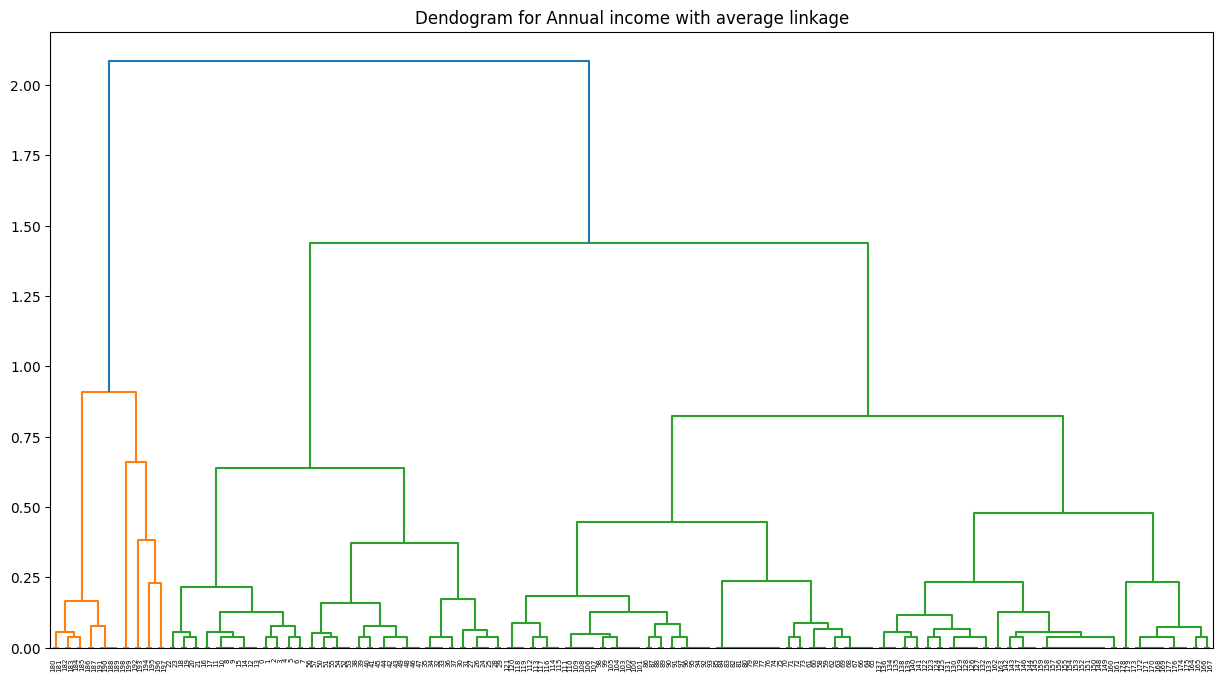

In [12]:
hc.dendogram(hc.linkages(X[['Annual Income (k$)']], 'average'), title='Dendogram for Annual income with average linkage')

This dendogram shows the 2 - 3 major clusters for annual income. We can see that the average / centroid linkage gives the best results.

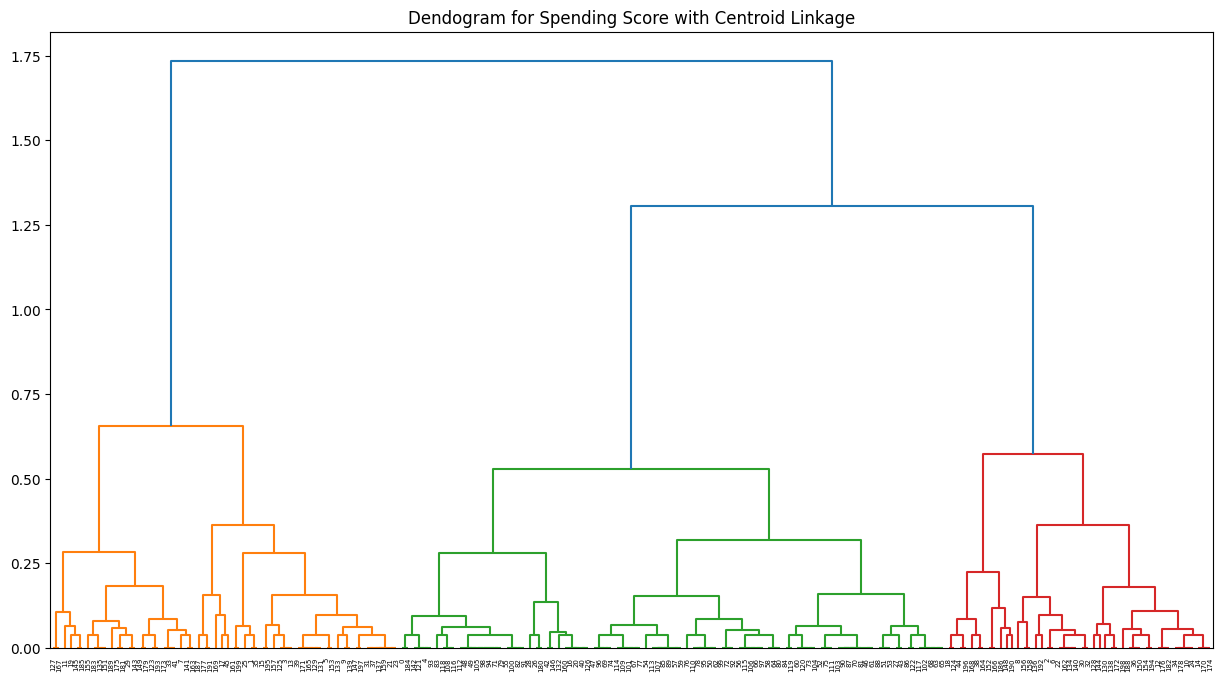

In [13]:
hc.dendogram(hc.linkages(X[['Spending Score (1-100)']], 'centroid'), title='Dendogram for Spending Score with Centroid Linkage')

Meanwhile these are the 3 major clusters for spending score, shown using centroid linkage.

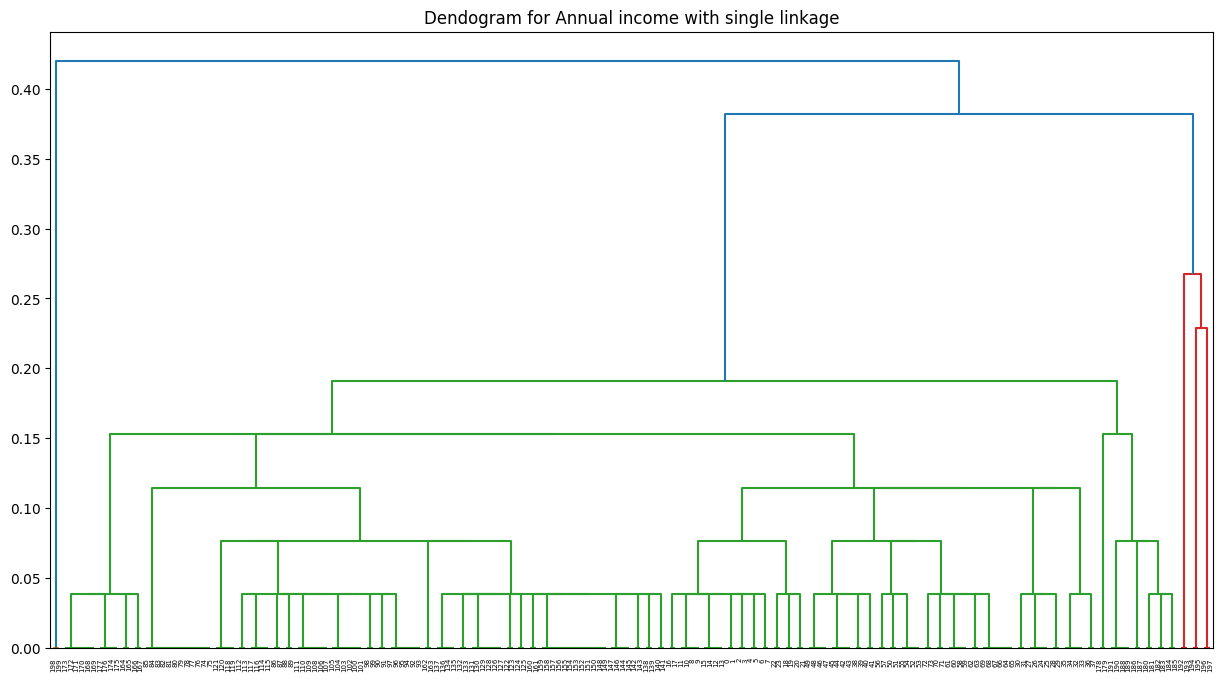

In [14]:
hc.dendogram(hc.linkages(X[['Annual Income (k$)']], 'single'), title='Dendogram for Annual income with single linkage')

This dendogram shows some outliers in blue and red for annual income, shown using single linkage.

Now we look at a set of features together.

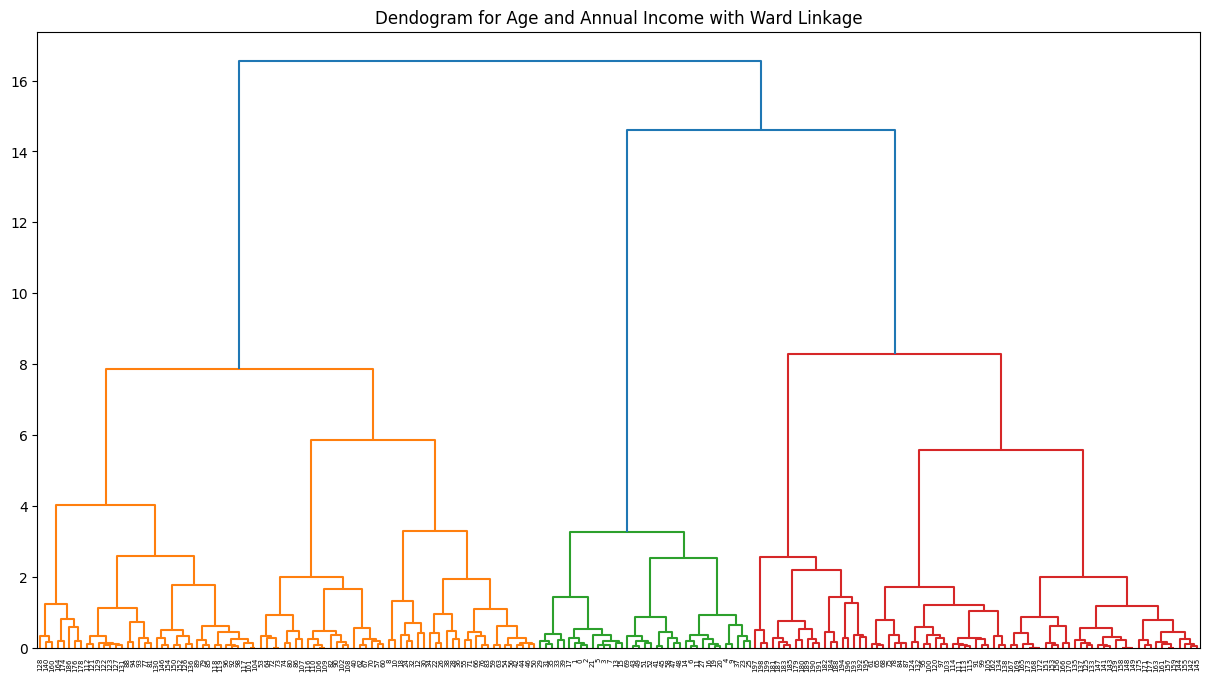

In [15]:
hc.dendogram(hc.linkages(X[['Age', 'Annual Income (k$)']], 'ward'), title='Dendogram for Age and Annual Income with Ward Linkage')

The above clustering shows the 3 major clusters for age and annual income, shown using ward linkage. These clusters represent different types of customer groups.

## Part 2: Hierarchical Clustering on Gene Expression Data

In the dataset, we are given 58 genes, their respective expression levels for 12 proteins and their IDs, resulting in a 58 × 13 matrix

In [16]:
# Load the dataset
gene_df = pd.read_csv('SMAI-Dataset-gene-expression/gene.csv')
gene_df.head()

,ID_REF,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,10338001,5192.23000,5974.6500,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,10338002,301.50300,307.6770,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,10338003,1850.11000,2037.5400,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,10338004,927.98300,1140.8200,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,10338005,5.24974,5.0173,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062


In [17]:
# Exclude the gene IDs
X = gene_df.iloc[:, 1:]
feature_names = X.columns
X.head()

,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,5192.23000,5974.6500,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,301.50300,307.6770,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,1850.11000,2037.5400,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,927.98300,1140.8200,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,5.24974,5.0173,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062


In [18]:
# Standardize the data
X = StandardScaler().fit_transform(X)

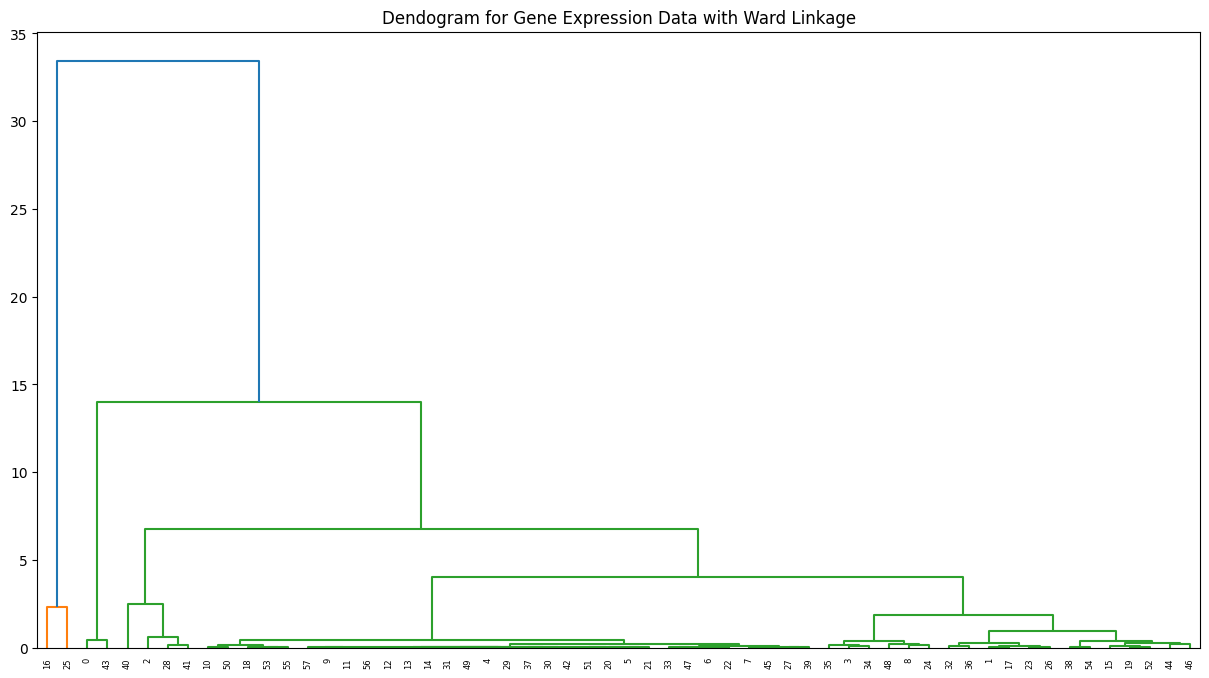

In [19]:
hc.dendogram(hc.linkages(X, 'ward'), title='Dendogram for Gene Expression Data with Ward Linkage')

The above is the dendogram for all features with ward linkage. It shows 2 outlier genes and one major cluster with most genes (except 2 outliers) in it.

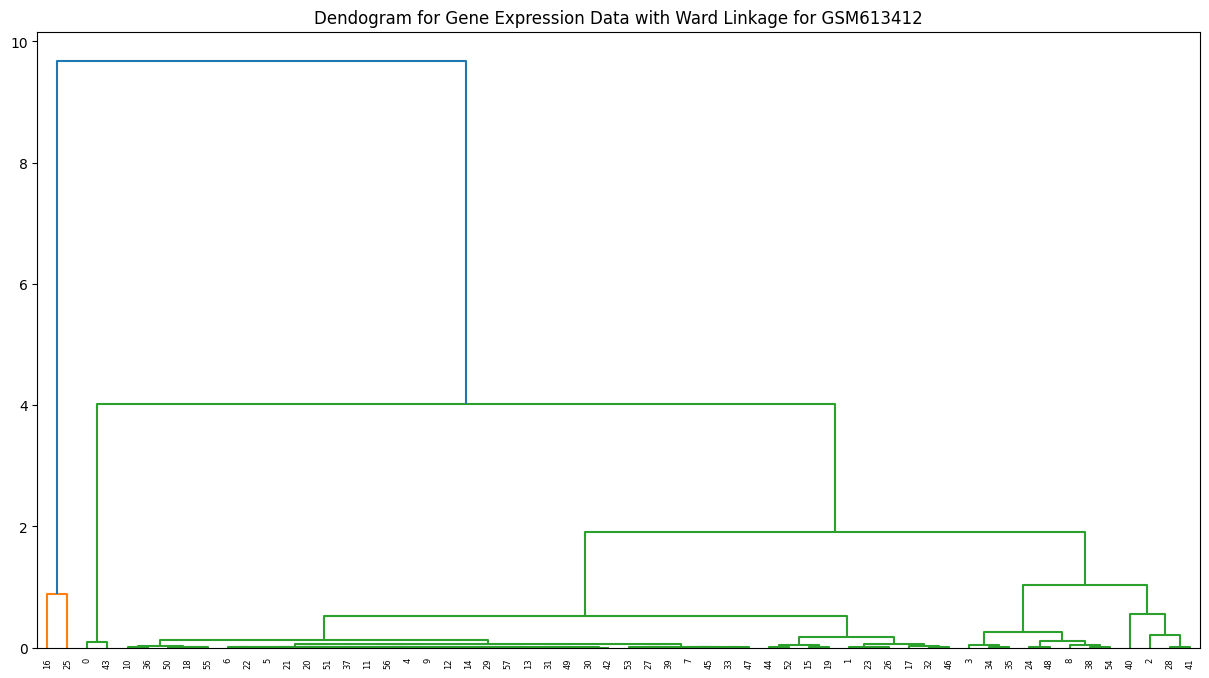

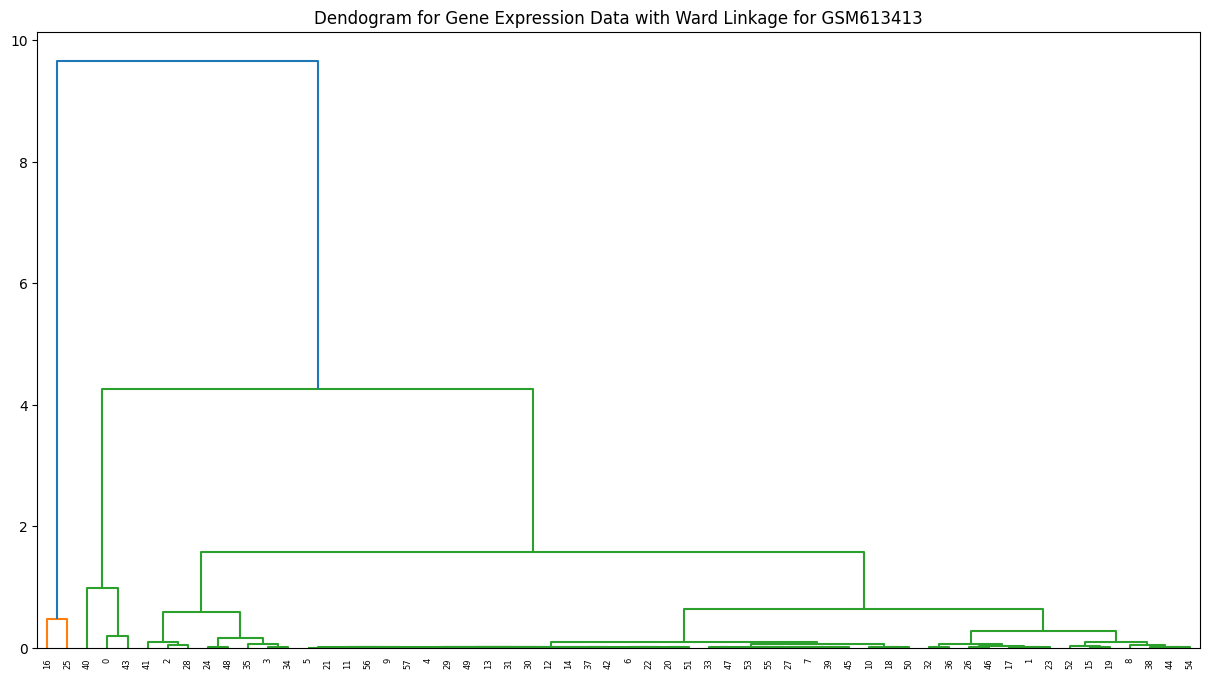

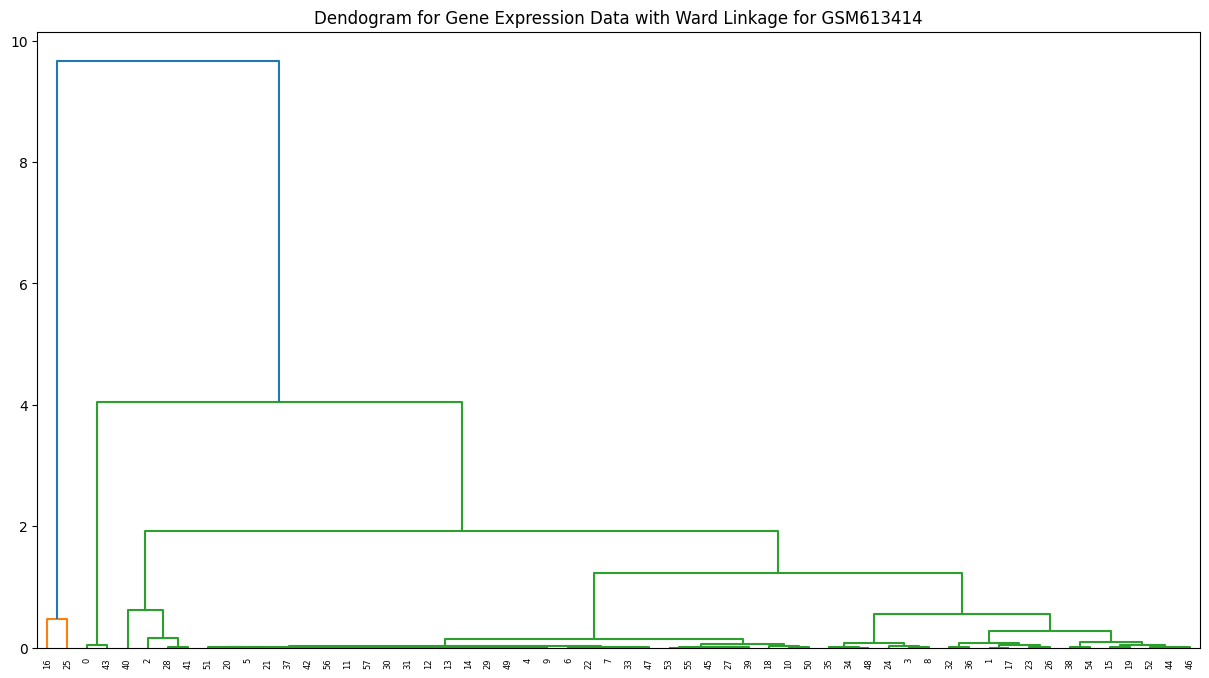

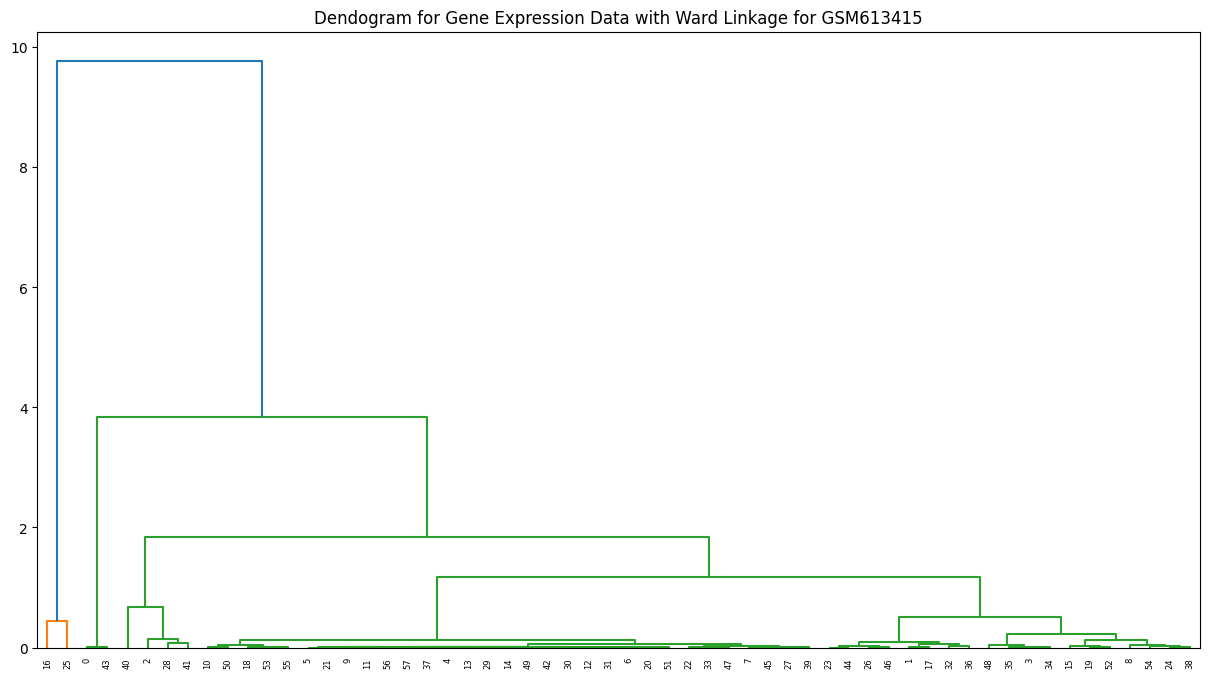

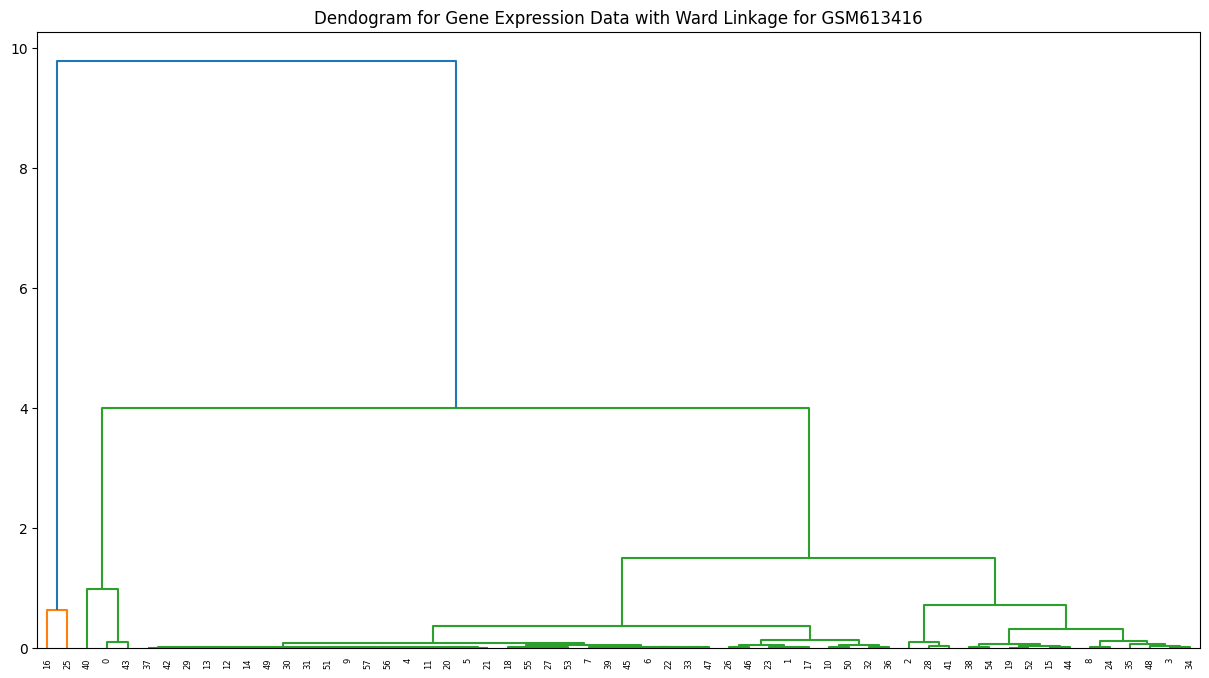

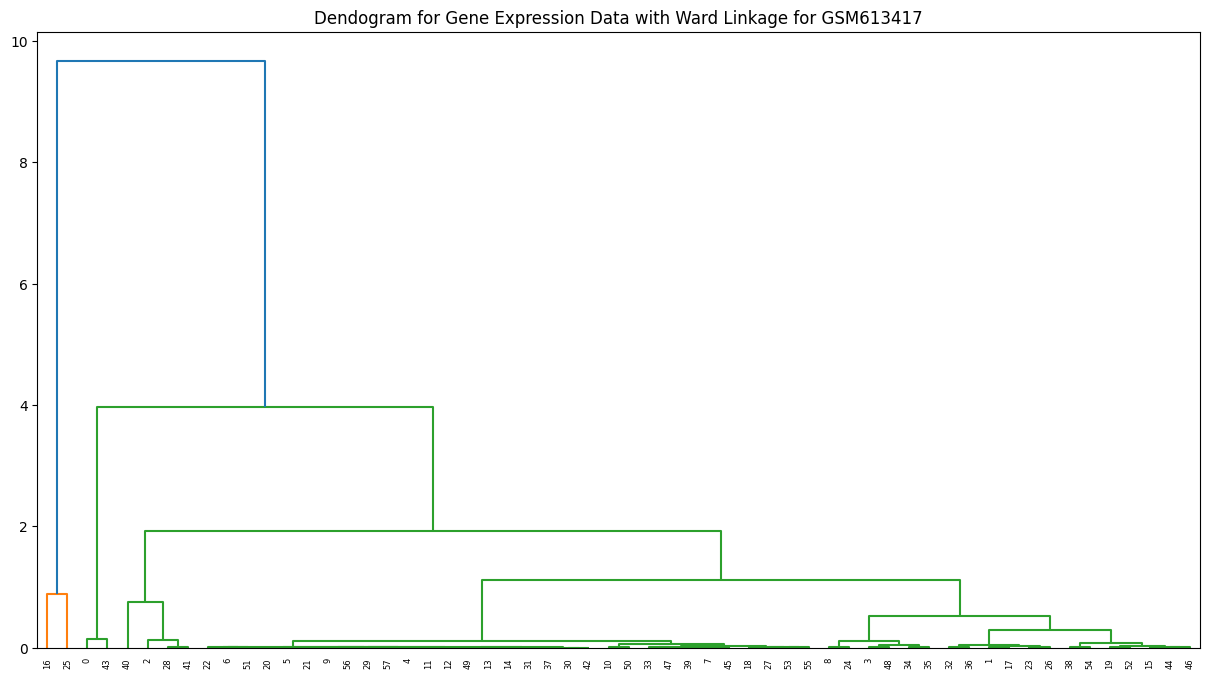

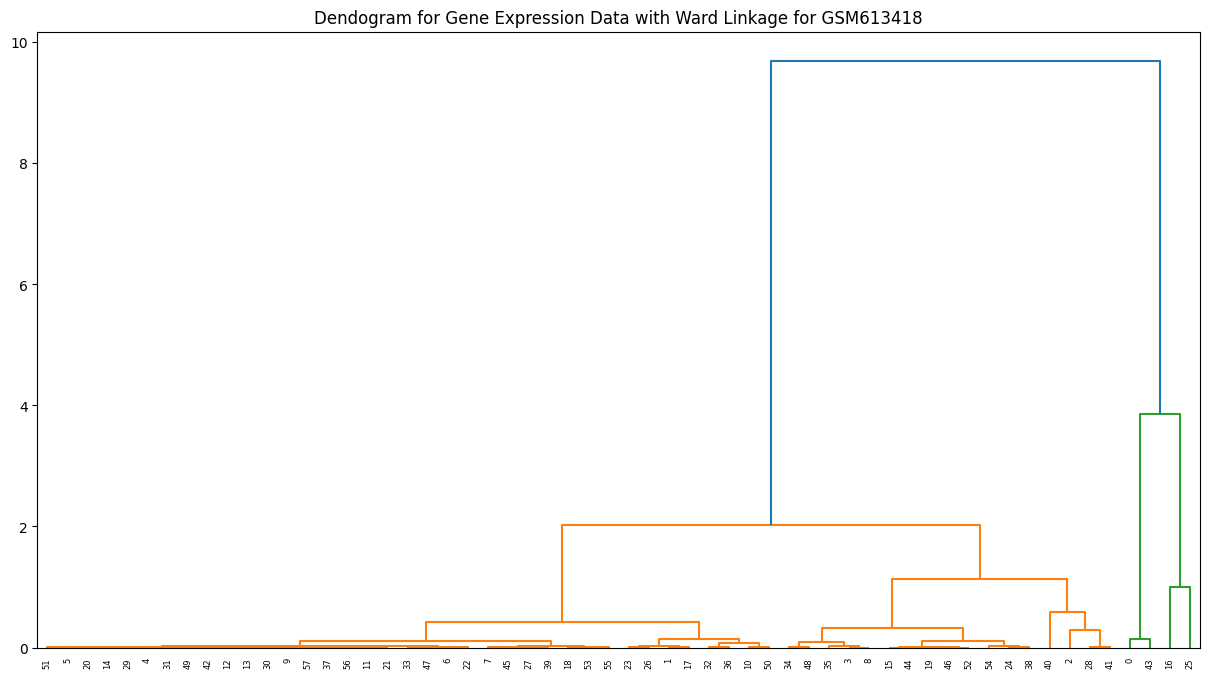

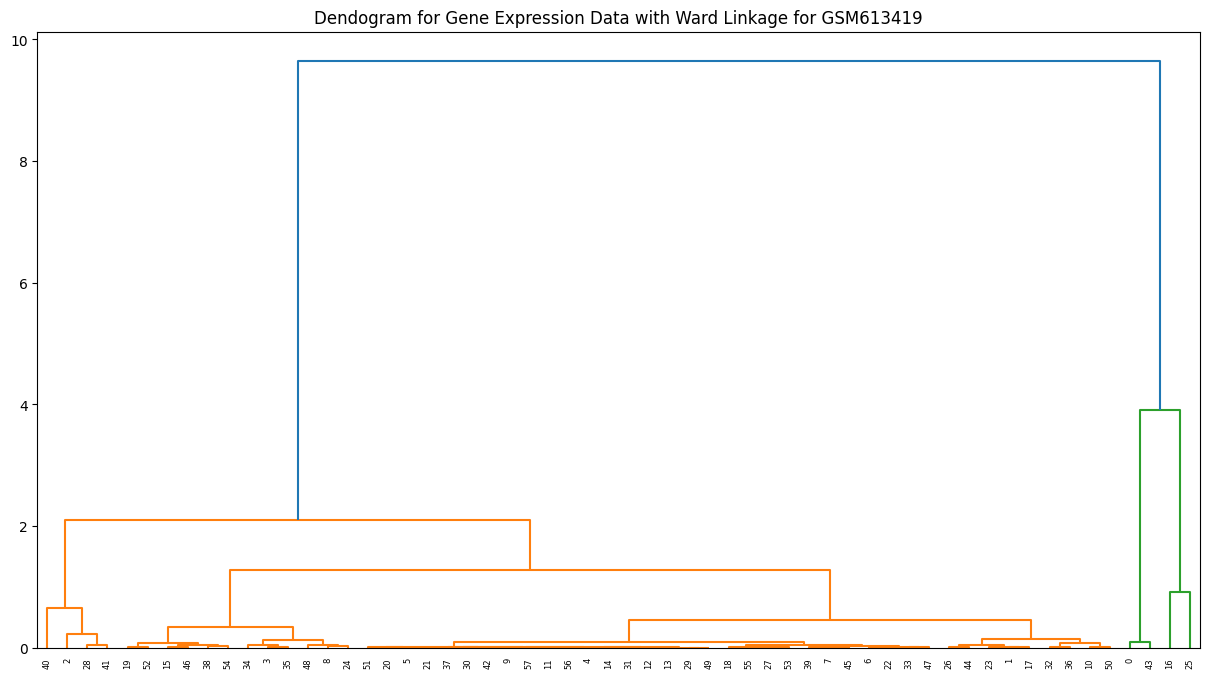

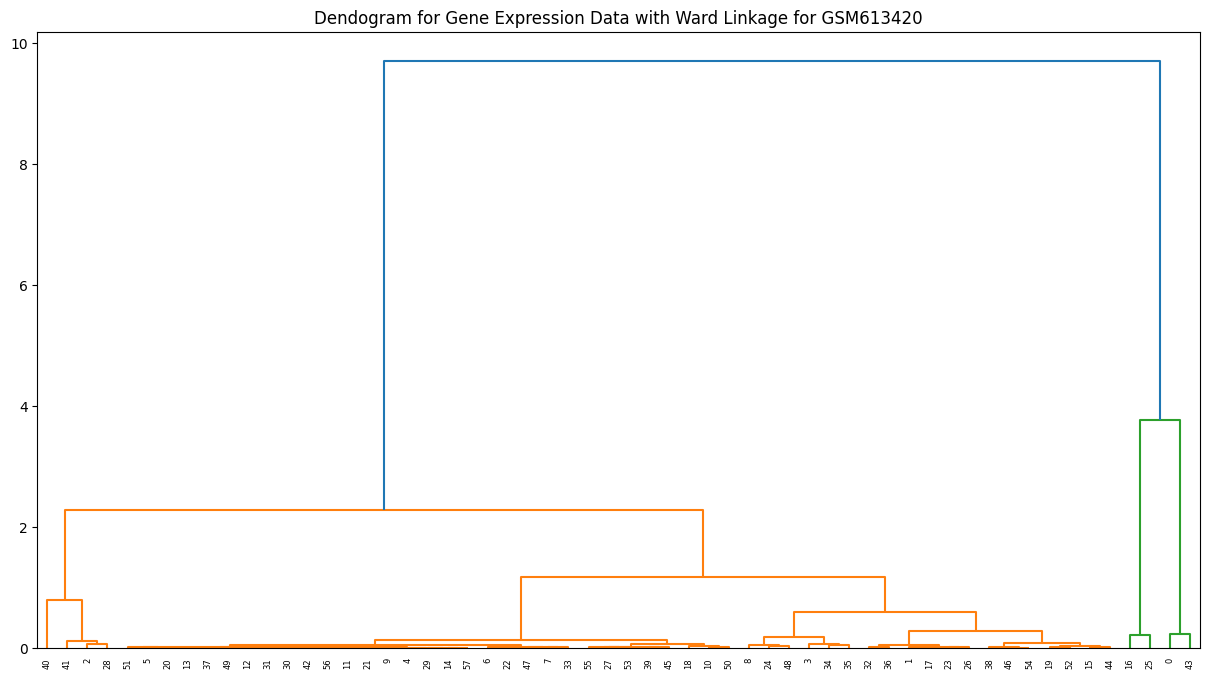

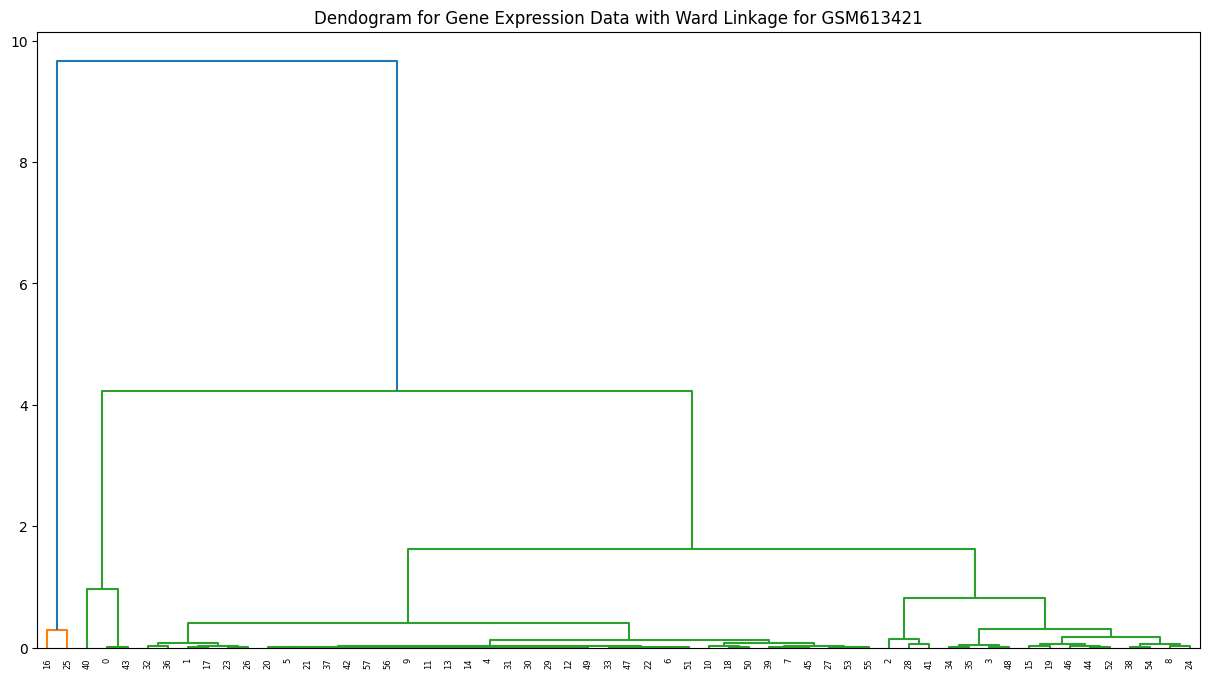

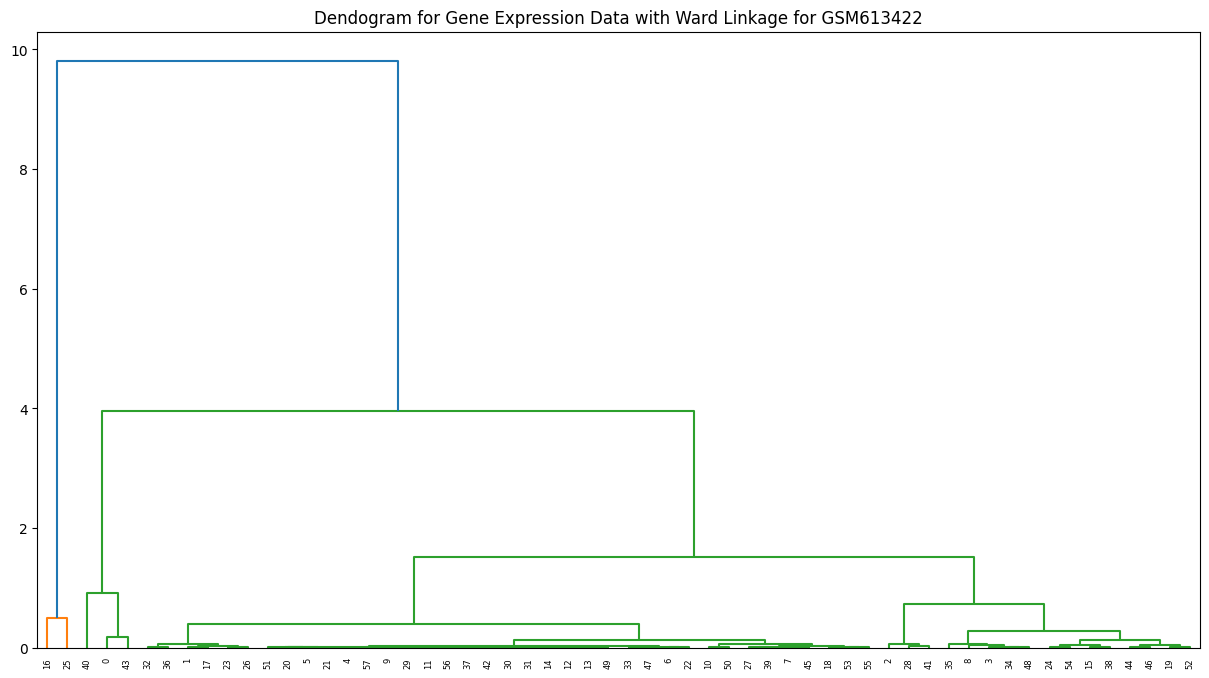

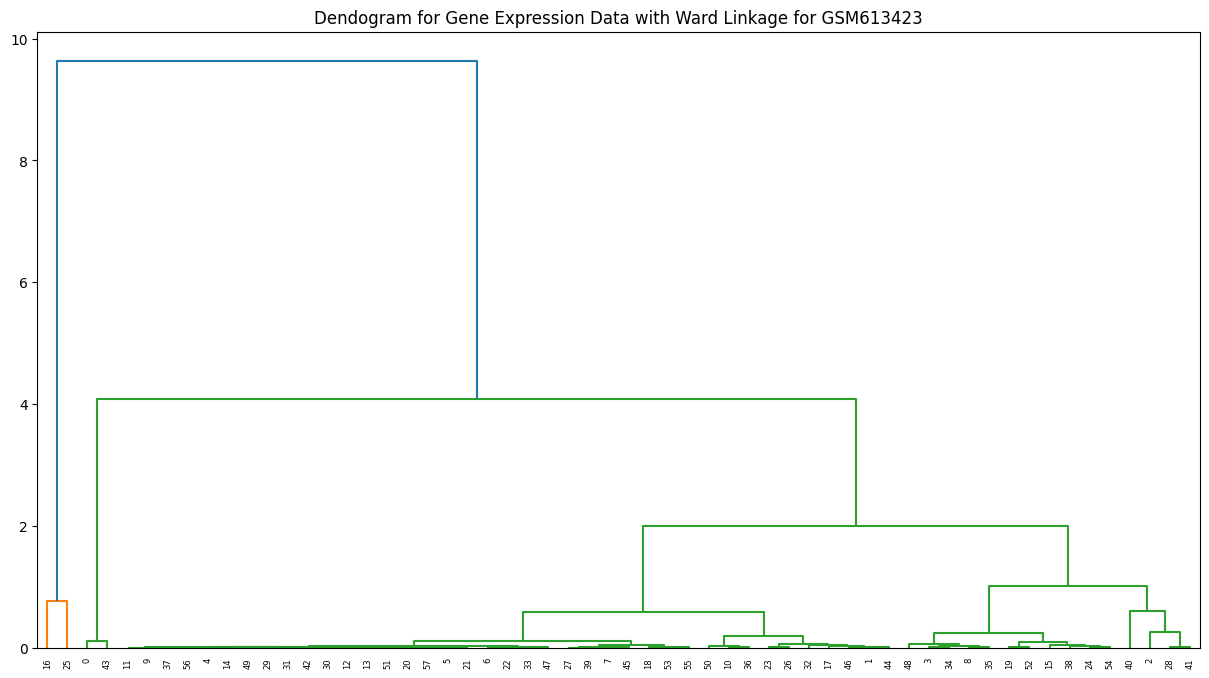

In [20]:
for i,f in enumerate(feature_names):
    hc.dendogram(hc.linkages(X[:, [i]], 'ward'), title='Dendogram for Gene Expression Data with Ward Linkage for {}'.format(f))

From the above plots, we can observe the following:
- Genes with ID 16 adn 25 are clear outliers for every protein.
- The clustering stays mostly the same over all proteins.
- There are 2 major clusters for every protein.

We also predict, since the clustering doesnt change for each protein, that taking a subset of proteins will not change the clustering much.

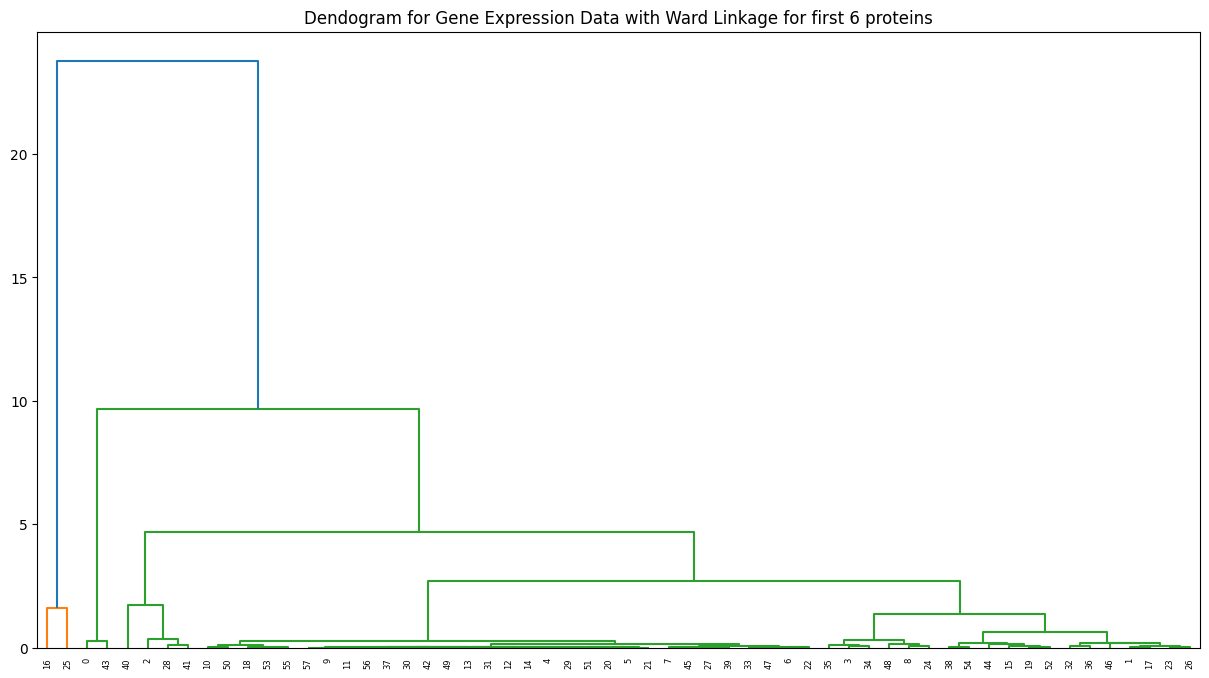

In [21]:
hc.dendogram(hc.linkages(X[:, [0, 1, 2, 3, 4, 5]], 'ward'), title='Dendogram for Gene Expression Data with Ward Linkage for first 6 proteins')